In [3]:
from importlib.machinery import SourceFileLoader
import pdb
import matplotlib.pyplot as plt
from time import sleep
from tqdm.notebook import tqdm_notebook
import numpy as np
from copy import copy
import pdb

In [4]:
plt.style.use('default')
plt.rc('figure', figsize = (15,8))
plt.rc('axes', labelsize=24)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

In [5]:
N = 10

# Comienzo a hacer los cambios

In [6]:
steps = int(1e5)
KT = np.hstack([ 2.2+np.logspace(-2, np.log10(3), 20) , 2.2-np.logspace(-2, np.log10(2),10)])
KT = KT[KT>0]
KT.sort()
KT = KT[::-1]
beta = 1/KT

In [7]:
changes = np.random.randint(N, size=(steps, 2, len(beta)))

In [12]:
len(changes)

100000

In [63]:
changes.shape[0]

100000

In [64]:
coins = np.random.rand(steps, len(beta))

  0%|                                                                                                         …

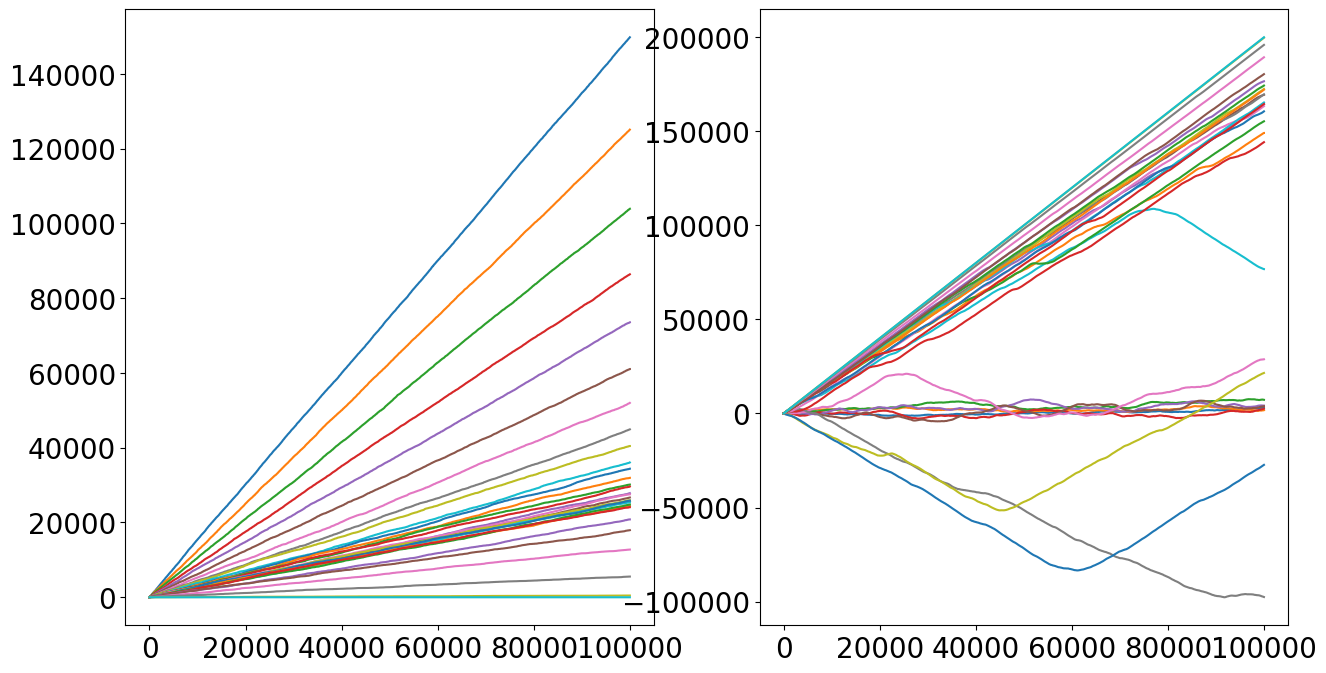

In [105]:
S = []
acumM = []
acumE = []
acumE2 = []
Mhist = []
Ehist = []
flips = []
metroflips = []
boltsfactors = []

fig, ax = plt.subplots(1,2)
progress = tqdm_notebook(enumerate(beta), ncols = 700, total=len(beta))
for t, Beta in progress:
    if len(S) > 0:
        S.append(copy(S[-1]))
    else:
        S.append( np.random.randint(2, size=(N,N))*2-1)
        
    NEIG0 =np.roll(S, 1, 0)+np.roll(S[-1], -1, 0)+np.roll(S[-1], 1, 1)+np.roll(S[-1], -1, 1)
    E = [-0.5*(S[-1]*NEIG0).sum()/N**2]
    M = [S[-1].sum()/N**2]
    E2 = [E[-1]**2]
    Macum = np.abs(M); Eacum = sum(E) ; E2acum = sum(E2)
    progress.set_description(f'Beta = {Beta}')
    flips.append(0)
    metroflips.append(0)
    boltsfactors.append([])
    
    
    
    for i, change in enumerate(changes[:,:,t]):
#        Saux = S[-1].copy()
#        NEIG = np.roll(Saux, 1, 0)+np.roll(Saux, -1, 0) + np.roll(Saux, 1, 1) + np.roll(Saux, -1, 1) 
        NEIG = S[-1][change[0]-N,change[1]]+S[-1][change[0]-1, change[1]] +\
               S[-1][change[0],change[1]-N] + S[-1][change[0],change[1]-1] 
        Saux = -copy(S[-1][change[0],change[1]])
#        DE_candidate = -2*S[-1][change[0],change[1]]*NEIG
        DE_candidate = -2*Saux*NEIG
        boltsfactors[-1].append(np.exp(-Beta*DE_candidate))
        if (DE_candidate < 0): 
            S[-1][change[0],change[1]] = Saux# copy(Saux)
            DE = copy(DE_candidate)
            flips[-1] += 1
        elif coins[i, t] < boltsfactors[-1][-1]:
            S[-1][change[0],change[1]] = copy(Saux) #-1# copy(Saux)
            DE = copy(DE_candidate)
            metroflips[-1] += 1
        else: 
            DE = 0
        M.append(M[-1]+2*S[-1][change[0],change[1]])
        E.append((E[-1]+DE))
        E2.append(E[-1]**2)
        Macum += np.abs(M[-1])
        Eacum += E[-1]
        E2acum += E2[-1]
    ax[0].plot(E)
    ax[1].plot(M)
#    Mhist.append(M[::5])
#    Ehist.append(E[::5])
    acumM.append(Macum/changes.shape[0]/N**2)
    acumE.append(Eacum/changes.shape[0]/N**2)
    acumE2.append(E2acum/changes.shape[0]/N**2)
    

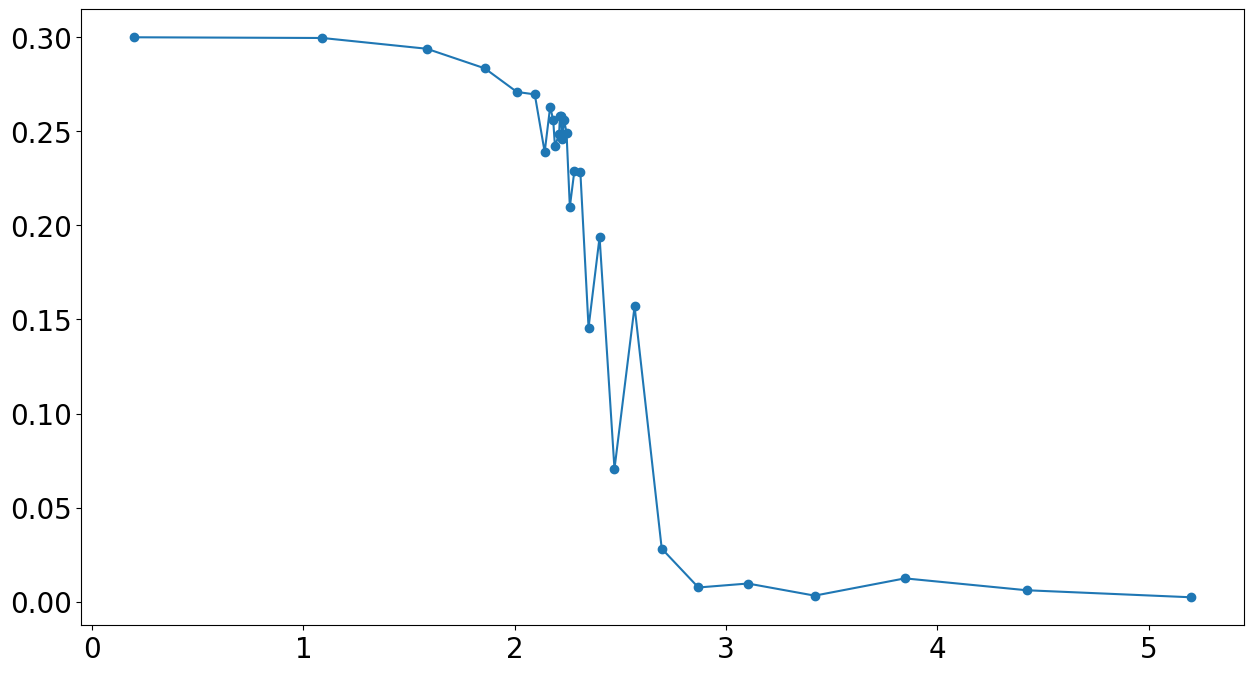

In [106]:
plt.plot(KT,np.array(acumM)*changes.shape[2]/changes.shape[0],'o-')

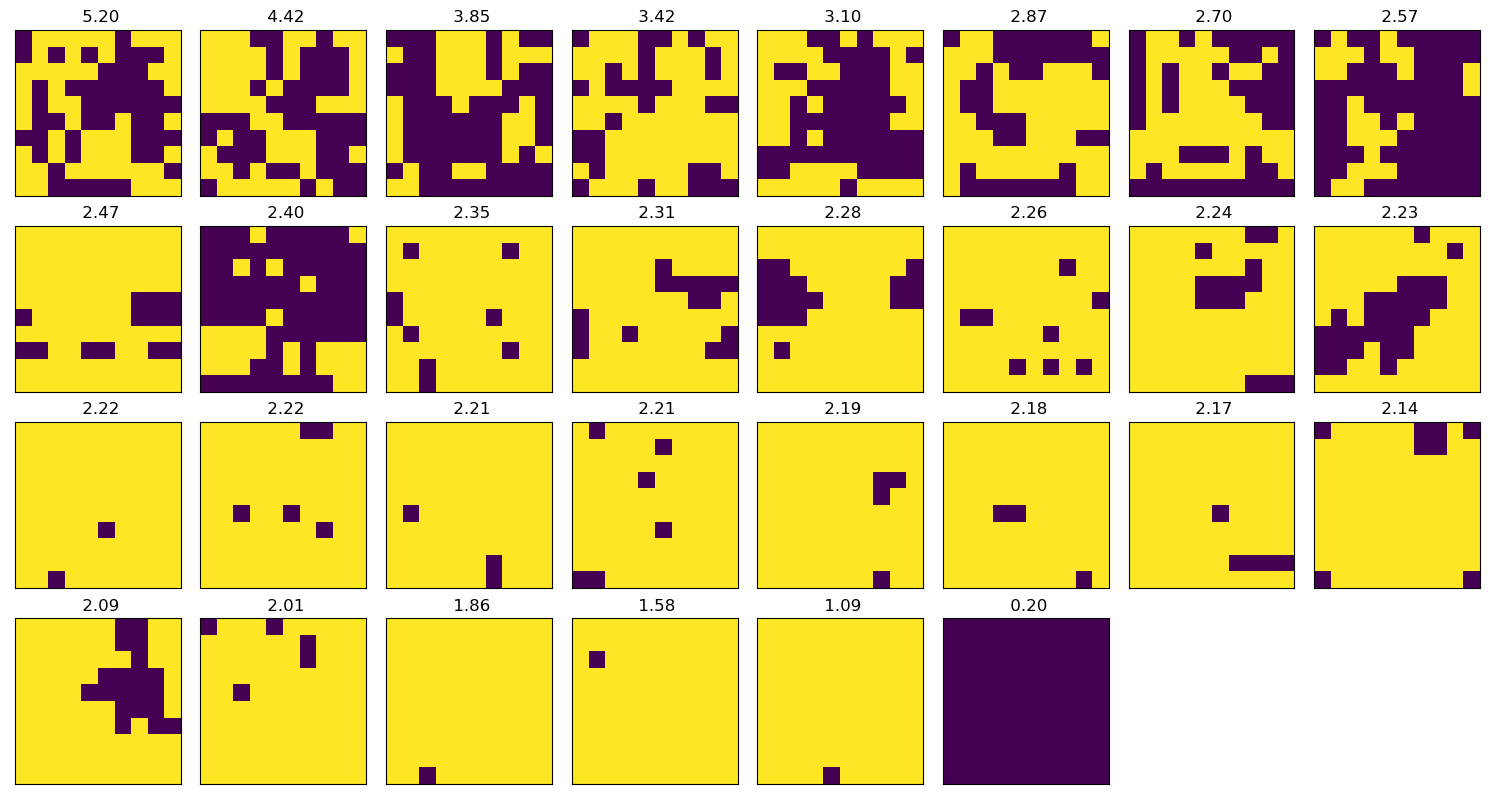

In [107]:
fig = plt.figure()
for i in range(len(S)):
    ax = fig.add_subplot(4, int(len(S)/4)+1, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(S[i])
    ax.set_title(' {:4.2f}'.format(KT[i]))
fig.tight_layout()

In [108]:
C = (np.array(acumE2) - np.array(acumE)**2)/KT**2

In [109]:
C

array([2.75381244e+06, 2.64480514e+06, 2.42628197e+06, 2.12811246e+06,
       1.84612489e+06, 1.49434993e+06, 1.21109419e+06, 9.85530177e+05,
       9.01461788e+05, 7.34406033e+05, 7.02643994e+05, 6.38842092e+05,
       5.93725799e+05, 5.65616048e+05, 5.01716445e+05, 4.66684172e+05,
       5.00870110e+05, 4.43696744e+05, 4.68826454e+05, 4.38649298e+05,
       4.58022552e+05, 4.15201458e+05, 4.20618454e+05, 4.29592595e+05,
       3.04918830e+05, 2.56268814e+05, 1.57032795e+05, 4.04538311e+04,
       4.60421701e+02, 6.58990123e+02])

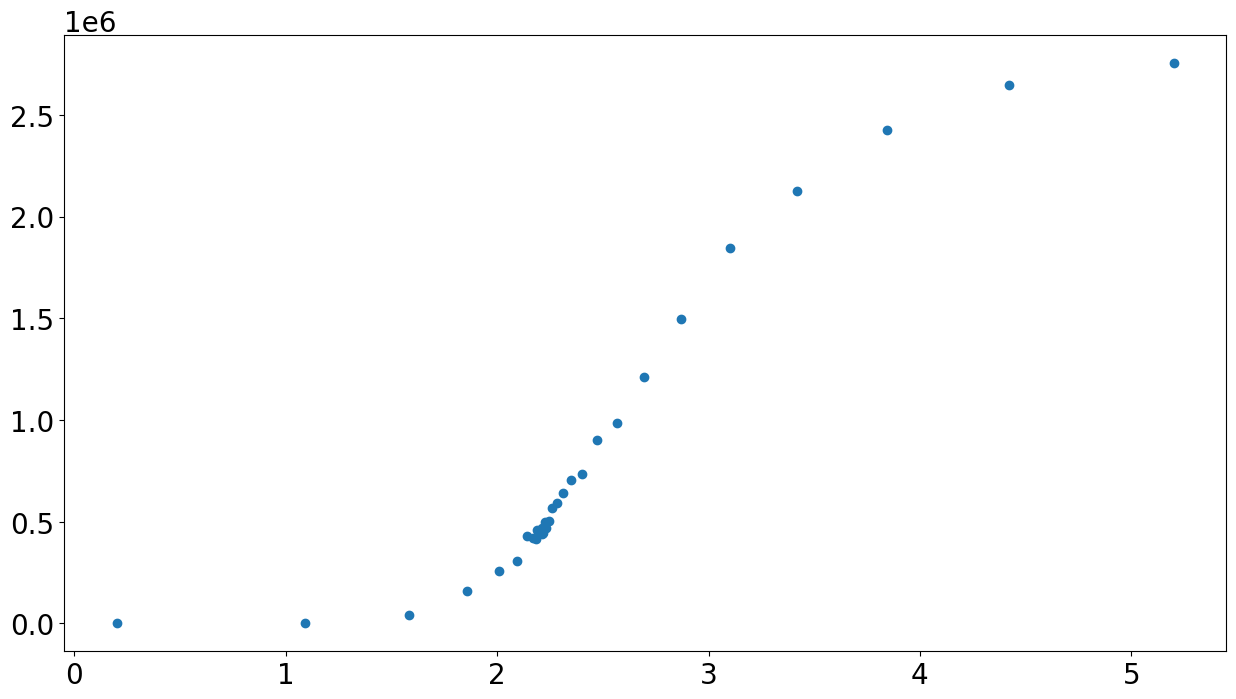

In [111]:
plt.plot(KT,C,'o')

In [49]:
changes.shape

(1000000, 2, 30)

In [50]:
KT

array([5.2       , 4.42201227, 3.8457795 , 3.41898075, 3.10286339,
       2.86872451, 2.69530469, 2.5668577 , 2.47172077, 2.40125563,
       2.34906416, 2.31040746, 2.28177558, 2.26056878, 2.24486152,
       2.23322762, 2.22461073, 2.21822844, 2.21350128, 2.21      ,
       2.19      , 2.18198352, 2.16754064, 2.14151965, 2.09463897,
       2.01017649, 1.85800481, 1.58384497, 1.08990538, 0.2       ])

In [56]:
np.array(metroflips)/changes.shape[0]

array([0.460698, 0.399713, 0.346393, 0.298822, 0.258926, 0.222087,
       0.195936, 0.168073, 0.145233, 0.129779, 0.122295, 0.112515,
       0.104683, 0.096582, 0.09523 , 0.096003, 0.09279 , 0.090586,
       0.089711, 0.089065, 0.08458 , 0.082803, 0.079704, 0.077396,
       0.067694, 0.054425, 0.035631, 0.015349, 0.001293, 0.      ])

In [57]:
np.shape(boltsfactors)

(30, 1000000)

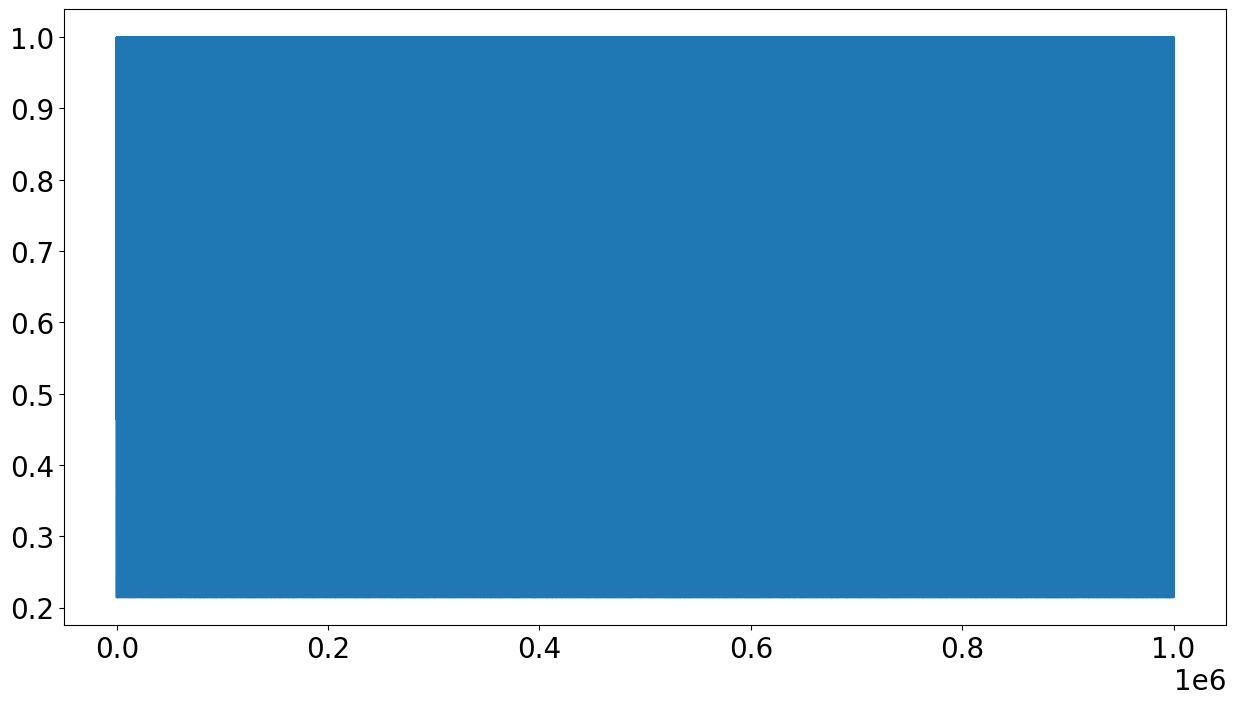

In [58]:
plt.plot(boltsfactors[0])